# Assignment 2

In [21]:
import gzip
from collections import defaultdict
import math
import scipy.optimize
from sklearn import svm
import string
import random
import string
from sklearn import linear_model
import csv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 데이터 불러오기
recipes = pd.read_csv('RAW_recipes_textProc_VecTag(th=5)_VecIng(th=500).csv')
interactions = pd.read_csv('RAW_interactions_textProc.csv')

# 'recipe_id'를 기준으로 두 데이터셋 병합
recipes = recipes.rename(columns={'id': 'recipe_id'})
data = interactions.merge(recipes, on='recipe_id')

# 사용자 ID를 숫자로 인코딩
user_encoder = LabelEncoder()
data['user_id'] = user_encoder.fit_transform(data['user_id'])

# 분석에 사용할 피처와 타겟 변수
feature_columns = ['user_id', 'minutes', 'n_steps', 'n_ingredients']
target_column = 'rating'  # 사용자 평가 점수가 타겟 변수라고 가정

In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 데이터 불러오기
# 파일에서 데이터를 읽고 변수 확인
recipes = pd.read_csv('RAW_recipes_textProc_VecTag(th=5)_VecIng(th=500).csv')
interactions = pd.read_csv('RAW_interactions_textProc.csv')

# 데이터 병합
recipes = recipes.rename(columns={'id': 'recipe_id'})
data = interactions.merge(recipes, on='recipe_id')

# 주요 feature 및 target 선택
feature_columns = ['minutes', 'n_steps', 'n_ingredients']
target_column = 'rating'

# 결측값 제거
data = data.dropna(subset=feature_columns + [target_column])

# X와 y로 분리
X = data[feature_columns]
y = data[target_column]

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 계수 및 절편 출력
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# 예측 및 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)

Coefficients: [ 2.72537734e-10 -4.92584817e-03  1.43488569e-03]
Intercept: 4.4469533835077675
Mean Squared Error (MSE): 1.6178408120071726
Mean Absolute Error (MAE): 0.8524607864246736
R^2 Score: 0.0004709125241226797


In [25]:
# Feature: minutes
X_minutes = data[['minutes']]
model_minutes = LinearRegression()
model_minutes.fit(X_minutes, y)

print("Feature: minutes")
print("  Coefficient:", model_minutes.coef_[0])
print("  Intercept:", model_minutes.intercept_)
print("  R^2 Score:", r2_score(y, model_minutes.predict(X_minutes)))

Feature: minutes
  Coefficient: 1.5146198866046543e-10
  Intercept: 4.411010564980721
  R^2 Score: 1.1097262776482708e-06


In [26]:
# Feature: n_steps
X_n_steps = data[['n_steps']]
model_n_steps = LinearRegression()
model_n_steps.fit(X_n_steps, y)

print("Feature: n_steps")
print("  Coefficient:", model_n_steps.coef_[0])
print("  Intercept:", model_n_steps.intercept_)
print("  R^2 Score:", r2_score(y, model_n_steps.predict(X_n_steps)))

Feature: n_steps
  Coefficient: -0.004600419614258283
  Intercept: 4.45530874389735
  R^2 Score: 0.0004481091515493585


In [27]:
# Feature: n_ingredients
X_n_ingredients = data[['n_ingredients']]
model_n_ingredients = LinearRegression()
model_n_ingredients.fit(X_n_ingredients, y)

print("Feature: n_ingredients")
print("  Coefficient:", model_n_ingredients.coef_[0])
print("  Intercept:", model_n_ingredients.intercept_)
print("  R^2 Score:", r2_score(y, model_n_ingredients.predict(X_n_ingredients)))

Feature: n_ingredients
  Coefficient: -0.0012097692389899618
  Intercept: 4.421845927857333
  R^2 Score: 1.245734568755541e-05


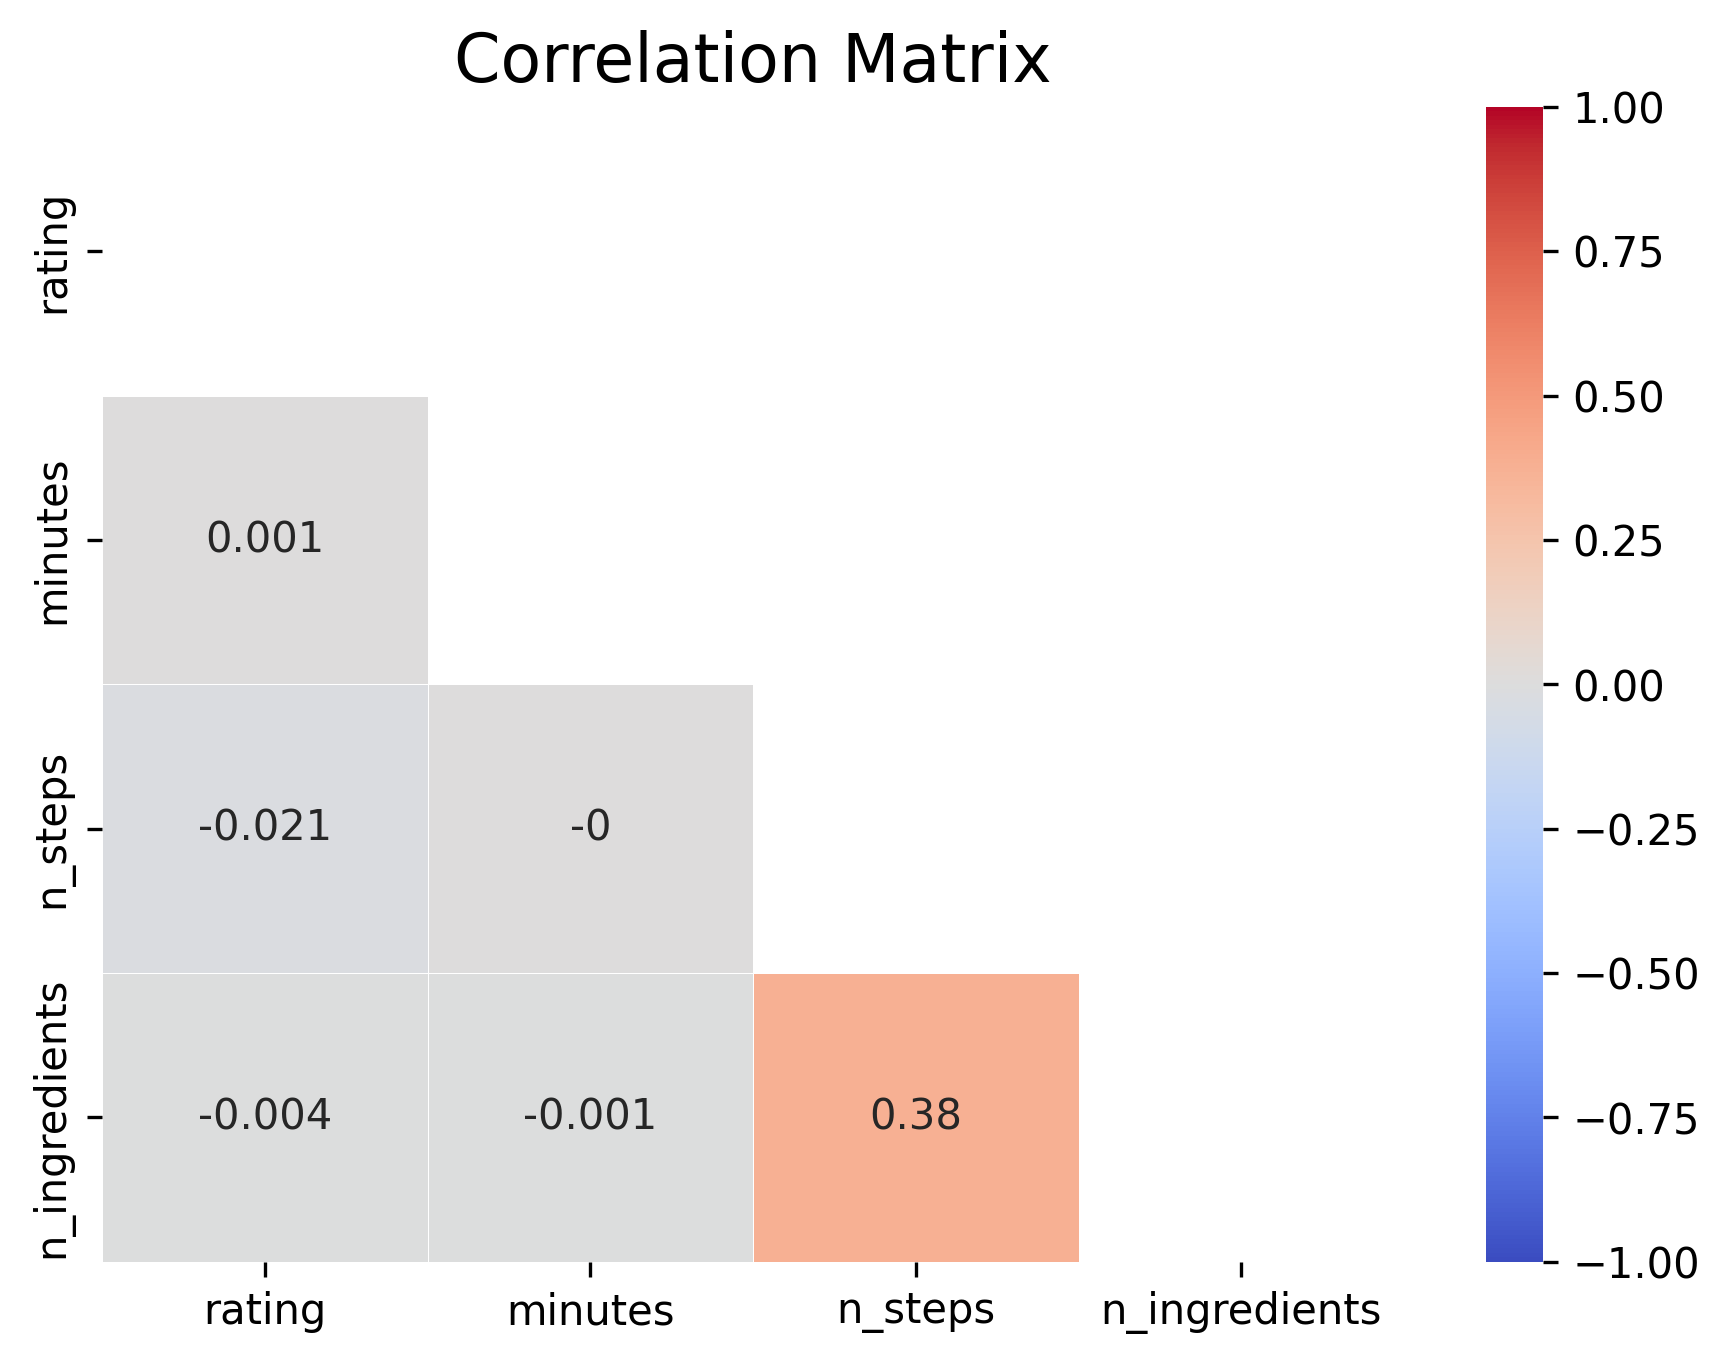

Feature: minutes
  Coefficient: 0.000
  Intercept: 4.411
  R^2 Score: 0.000

Feature: n_steps
  Coefficient: -0.005
  Intercept: 4.455
  R^2 Score: 0.000

Feature: n_ingredients
  Coefficient: -0.001
  Intercept: 4.422
  R^2 Score: 0.000



In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the datasets
recipes = pd.read_csv('RAW_recipes_textProc_VecTag(th=5)_VecIng(th=500).csv')
interactions = pd.read_csv('RAW_interactions_textProc.csv')

# Rename and merge datasets on 'recipe_id'
recipes = recipes.rename(columns={'id': 'recipe_id'})
data = interactions.merge(recipes, on='recipe_id')

# Encode 'user_id' using LabelEncoder
user_encoder = LabelEncoder()
data['user_id'] = user_encoder.fit_transform(data['user_id'])

# Prepare the features for correlation matrix
corr_columns = [
    'rating', 'minutes', 'n_steps', 'n_ingredients'
]
data_filtered = data[corr_columns]
data_filtered = data_filtered.dropna()  # Drop rows with missing values

# Calculate correlation matrix
corr_matrix = data_filtered.corr().round(3)

# Plot the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(7, 5), dpi=300)
sns.heatmap(corr_matrix, vmin=-1, vmax=1, linewidths=.2, center=0.0, mask=mask, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix", fontsize=16)
plt.show()

# Linear regression for selected features
target_column = 'rating'
features = ['minutes', 'n_steps', 'n_ingredients']

y = data_filtered[target_column]
for feature in features:
    X = data_filtered[[feature]]
    model = LinearRegression()
    model.fit(X, y)
    
    print(f"Feature: {feature}")
    print(f"  Coefficient: {model.coef_[0]:.3f}")
    print(f"  Intercept: {model.intercept_:.3f}")
    print(f"  R^2 Score: {r2_score(y, model.predict(X)):.3f}\n")

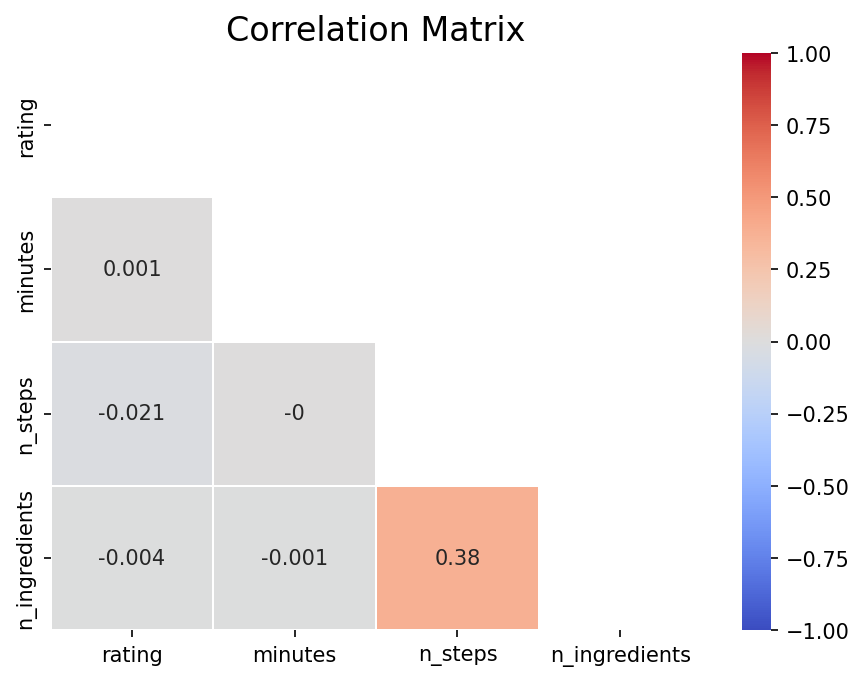

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the datasets
recipes = pd.read_csv('RAW_recipes_textProc_VecTag(th=5)_VecIng(th=500).csv')
interactions = pd.read_csv('RAW_interactions_textProc.csv')

# Rename and merge datasets on 'recipe_id'
recipes = recipes.rename(columns={'id': 'recipe_id'})
data = interactions.merge(recipes, on='recipe_id')

# Encode 'user_id' using LabelEncoder
user_encoder = LabelEncoder()
data['user_id'] = user_encoder.fit_transform(data['user_id'])

# Prepare the features for correlation matrix
corr_columns = [
    'rating', 'minutes', 'n_steps', 'n_ingredients'
]
data_filtered = data[corr_columns]
data_filtered = data_filtered.dropna()  # Drop rows with missing values


# Calculate correlation matrix
corr_matrix = data_filtered.corr().round(3)

# Plot the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(7, 5), dpi=150)
sns.heatmap(corr_matrix, vmin=-1, vmax=1, linewidths=.2, center=0.0, mask=mask, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the datasets
recipes = pd.read_csv('RAW_recipes_textProc_VecTag(th=5)_VecIng(th=500).csv')
interactions = pd.read_csv('RAW_interactions_textProc.csv')

# Rename and merge datasets on 'recipe_id'
recipes = recipes.rename(columns={'id': 'recipe_id'})
data = interactions.merge(recipes, on='recipe_id')

# Encode 'user_id' using LabelEncoder
user_encoder = LabelEncoder()
data['user_id'] = user_encoder.fit_transform(data['user_id'])

# Prepare the features for correlation matrix
corr_columns = [
    'rating', 'minutes', 'n_steps', 'n_ingredients'
]
data_filtered = data[corr_columns]
data_filtered = data_filtered.dropna() 

nutrition_cols = ['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']
recipes[nutrition_cols] = recipes['nutrition'].apply(
    lambda x: pd.Series(eval(x)) if pd.notnull(x) else pd.Series([None] * 6)
)

# Merge updated recipes with interactions
data = interactions.merge(recipes, on='recipe_id')

corr_matrix = data_filtered.corr().round(3)

print(data_filtered)
print(corr_matrix)

         rating  minutes  n_steps  n_ingredients
0             4      495        4              9
1             5      495        4              9
2             4       20        5              4
3             5       10        3             13
4             5       10        3             13
...         ...      ...      ...            ...
1132362       0       22        6              6
1132363       5       21        9              8
1132364       5      115        8             10
1132365       4      115        8             10
1132366       5      115        8             10

[1132367 rows x 4 columns]
               rating  minutes  n_steps  n_ingredients
rating          1.000    0.001   -0.021         -0.004
minutes         0.001    1.000   -0.000         -0.001
n_steps        -0.021   -0.000    1.000          0.380
n_ingredients  -0.004   -0.001    0.380          1.000


         rating  minutes  n_steps  n_ingredients  calories  total_fat   sugar  \
0             4      495        4              9     204.8        5.0     9.0   
1             5      495        4              9     204.8        5.0     9.0   
2             4       20        5              4     132.3       11.0    39.0   
3             5       10        3             13    2786.2      342.0   134.0   
4             5       10        3             13    2786.2      342.0   134.0   
...         ...      ...      ...            ...       ...        ...     ...   
1132362       0       22        6              6    1941.7        3.0  1569.0   
1132363       5       21        9              8     124.7        1.0    11.0   
1132364       5      115        8             10     828.2       87.0    22.0   
1132365       4      115        8             10     828.2       87.0    22.0   
1132366       5      115        8             10     828.2       87.0    22.0   

         sodium  protein  s

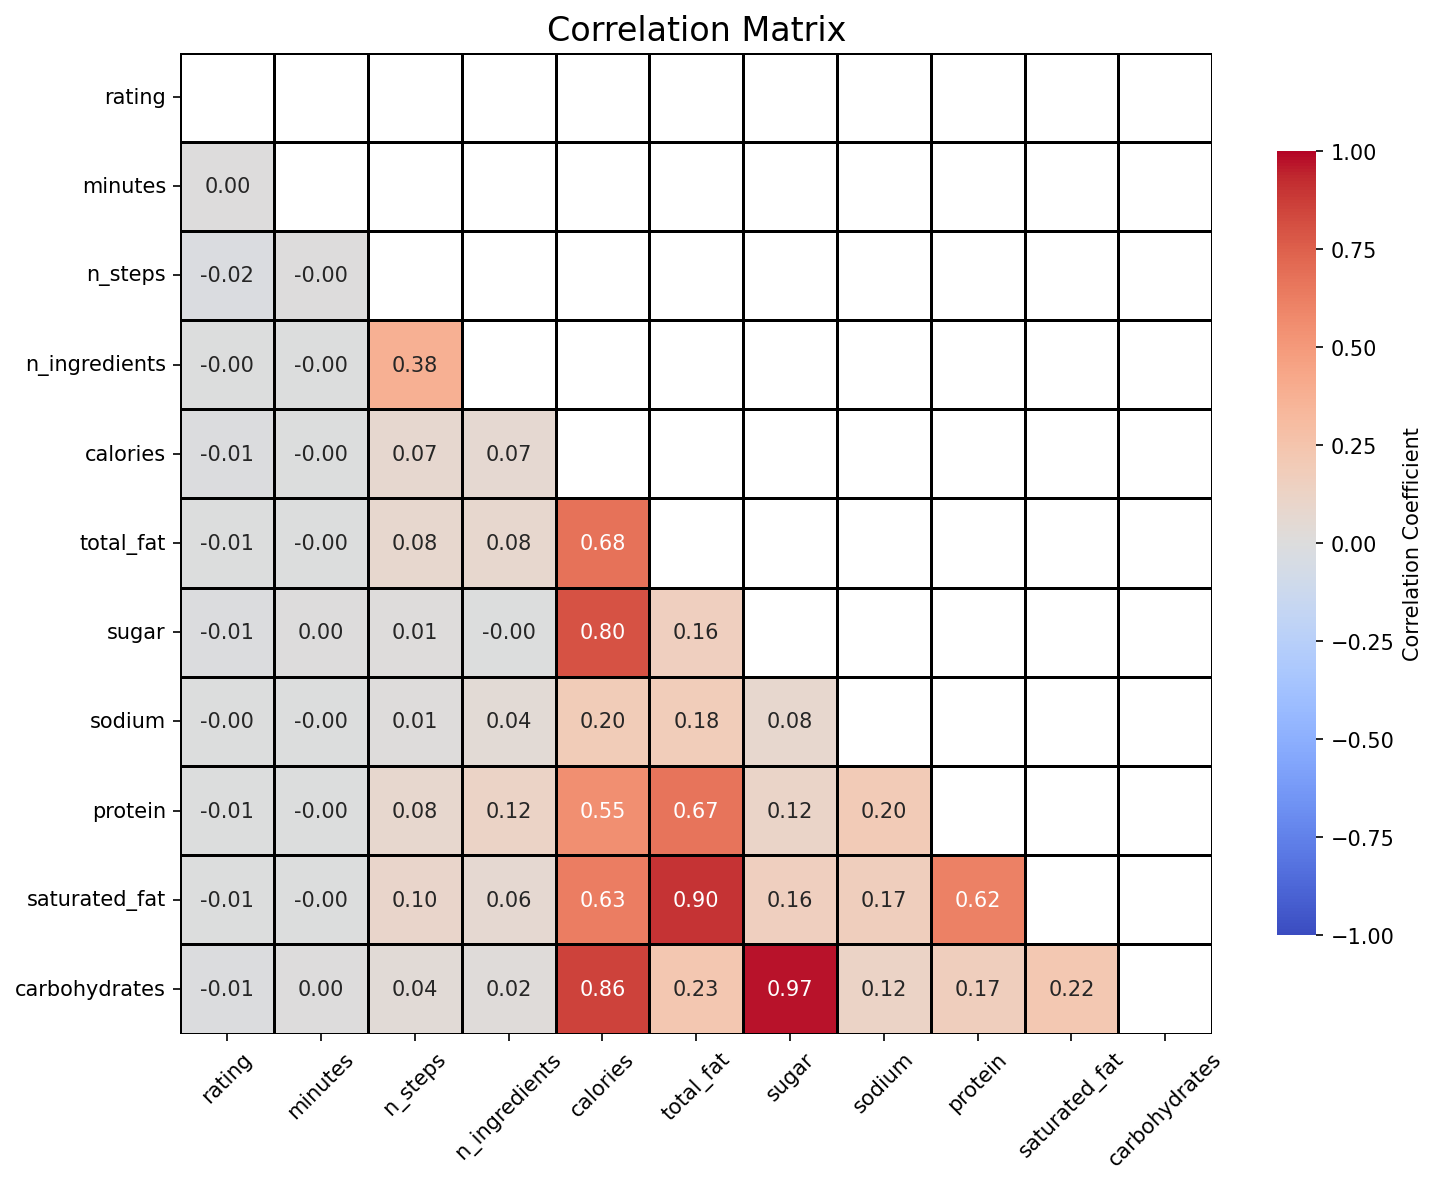

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the datasets
recipes = pd.read_csv('RAW_recipes_textProc_VecTag(th=5)_VecIng(th=500).csv')
interactions = pd.read_csv('RAW_interactions_textProc.csv')

# Rename and merge datasets on 'recipe_id'
recipes = recipes.rename(columns={'id': 'recipe_id'})

# Safely split the nutrition column into separate features
nutrition_cols = ['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']
recipes[nutrition_cols] = recipes['nutrition'].apply(
    lambda x: pd.Series(eval(x)) if pd.notnull(x) else pd.Series([None] * len(nutrition_cols))
)

# Merge updated recipes with interactions
data = interactions.merge(recipes, on='recipe_id')

# Encode 'user_id' using LabelEncoder
user_encoder = LabelEncoder()
data['user_id'] = user_encoder.fit_transform(data['user_id'])

# Prepare the features for correlation matrix
corr_columns = [
    'rating', 'minutes', 'n_steps', 'n_ingredients',
    'calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates'
]
data_filtered = data[corr_columns]
data_filtered = data_filtered.dropna()  # Drop rows with missing values

# Calculate correlation matrix
corr_matrix = data_filtered.corr().round(3)

# Print filtered data and correlation matrix
print(data_filtered)
print(corr_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 8), dpi=150)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, 
    annot=True,  
    cmap='coolwarm',  
    fmt=".2f",  
    linewidths=0.5,  
    linecolor='black',  
    mask=mask,  
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}
)
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [43]:
# Linear regression for selected features
target_column = 'rating'
features = ['minutes', 'n_steps', 'n_ingredients', 'calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']

y = data_filtered[target_column]
for feature in features:
    X = data_filtered[[feature]]
    model = LinearRegression()
    model.fit(X, y)
    
    print(f"Feature: {feature}")
    print(f"  Coefficient: {model.coef_[0]:.3f}")
    print(f"  Intercept: {model.intercept_:.3f}")
    print(f"  R^2 Score: {r2_score(y, model.predict(X)):.3f}\n")

Feature: minutes
  Coefficient: 0.000
  Intercept: 4.411
  R^2 Score: 0.000

Feature: n_steps
  Coefficient: -0.005
  Intercept: 4.455
  R^2 Score: 0.000

Feature: n_ingredients
  Coefficient: -0.001
  Intercept: 4.422
  R^2 Score: 0.000

Feature: calories
  Coefficient: -0.000
  Intercept: 4.418
  R^2 Score: 0.000

Feature: total_fat
  Coefficient: -0.000
  Intercept: 4.415
  R^2 Score: 0.000

Feature: sugar
  Coefficient: -0.000
  Intercept: 4.413
  R^2 Score: 0.000

Feature: sodium
  Coefficient: -0.000
  Intercept: 4.412
  R^2 Score: 0.000

Feature: protein
  Coefficient: -0.000
  Intercept: 4.414
  R^2 Score: 0.000

Feature: saturated_fat
  Coefficient: -0.000
  Intercept: 4.415
  R^2 Score: 0.000

Feature: carbohydrates
  Coefficient: -0.000
  Intercept: 4.415
  R^2 Score: 0.000



In [47]:
regression_results = []
y = data_filtered[target_column]
for feature in features:
    X = data_filtered[[feature]]
    model = LinearRegression()
    model.fit(X, y)
    
    regression_results.append({
        "Feature": feature,
        "Coefficient": model.coef_[0],
        "Intercept": model.intercept_,
        "R^2 Score": r2_score(y, model.predict(X))
    })

# Convert results to a DataFrame
regression_df = pd.DataFrame(regression_results)

# Display the results as a chart
import ace_tools as tools; tools.display_dataframe_to_user(name="Linear Regression Results by Feature", dataframe=regression_df)

ModuleNotFoundError: No module named 'ace_tools'

In [46]:
pip install tools

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 4.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 9.3 MB/s eta 0:00:00a 0:00:01m
  Created wheel for tools: filename=tools-0.1.9-py3-none-any.whl size=46730 sha256=4fb96a60cedd05223005460aa060cc7172d3287bb987887ee83f65f31947446f
  Stored in directory: /Users/m1mac/Library/Caches/pip/wheels/21/c1/ce/3732acbc72a85e35b32ff9f725f0af08dad27d409e3ebfa9e0
  Created wheel for pytils: filename=pytils-0.4.1-py3-none-any.whl size=32875 sha256=bf80a1f9bf961f45ed32ff9ba218bdf4ef42c381e8ad04620c7783aabbf34efa
  Stored in directory: /Users/m1mac/Library/Caches/pip/wheels/75/2a/25/dfcdc94033c8b2fed52c1525927e2d52a456343444de6bcb33
Successfully built too